# Indicium Lighthouse 2023-09
## Desafio Cientista de Dados
### Proponente: Adilio de Sousa Farias

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


## Carregamento e informações iniciais sobre os dados

In [3]:
# Carregando e visualizando os dados de treino
cars_train = pd.read_csv("/content/drive/MyDrive/Projetos/Desafio Indicium/cars_train.csv", encoding='UTF-16', delimiter='\t')
cars_train.head()

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,...,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado,preco
0,300716223898539419613863097469899222392,8.0,NISSAN,KICKS,1.6 16V FLEXSTART SL 4P XTRONIC,2017,2017.0,67772.0,CVT,4,...,False,NaN,NaN,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,NaN,NaN,NaN,74732.590084
1,279639842134129588306469566150288644214,8.0,JEEP,COMPASS,2.0 16V FLEX LIMITED AUTOMÁTICO,2017,2017.0,62979.0,Automática,4,...,False,Aceita troca,NaN,NaN,IPVA pago,NaN,NaN,NaN,NaN,81965.332634
2,56414460810621048900295678236538171981,16.0,KIA,SORENTO,2.4 16V GASOLINA EX 7L AWD AUTOMÁTICO,2018,2019.0,44070.0,Automática,4,...,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162824.814472
3,56862509826849933428086372390159405545,14.0,VOLKSWAGEN,AMAROK,2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIES...,2013,2015.0,85357.0,Automática,4,...,False,Aceita troca,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,123681.358857
4,338980975753200343894519909855598027197,8.0,SSANGYONG,KORANDO,2.0 GLS 4X4 16V TURBO DIESEL 4P AUTOMÁTICO,2013,2015.0,71491.0,Automática,4,...,False,NaN,NaN,Todas as revisões feitas pela concessionária,NaN,NaN,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,NaN,82419.763891


In [4]:
# Carregando e visualizando os dados de teste
cars_test = pd.read_csv("/content/drive/MyDrive/Projetos/Desafio Indicium/cars_test.csv", encoding='UTF-16', delimiter='\t')
cars_test.head()

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,...,troca,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado
0,13518783164498355150900635905895481162,8.0,NISSAN,VERSA,1.6 16V FLEXSTART V-DRIVE MANUAL,2021,2021.0,20258.0,Manual,4,...,False,False,Aceita troca,NaN,NaN,IPVA pago,Licenciado,Garantia de fábrica,NaN,NaN
1,299896161723793383246777788797566040330,18.0,FIAT,STRADA,1.4 MPI WORKING CS 8V FLEX 2P MANUAL,2021,2021.0,53045.0,Manual,2,...,False,False,Aceita troca,Único dono,NaN,IPVA pago,Licenciado,NaN,NaN,NaN
2,316180649972302128246133616457018378621,8.0,AUDI,Q5,2.0 TFSI GASOLINA BLACK S TRONIC,2018,2019.0,32486.0,Automática,4,...,False,False,Aceita troca,NaN,NaN,IPVA pago,NaN,NaN,NaN,NaN
3,222527157104148385909188217274642813298,16.0,CHEVROLET,CRUZE,1.4 TURBO LT 16V FLEX 4P AUTOMÁTICO,2019,2020.0,24937.0,Automática,4,...,False,False,Aceita troca,Único dono,NaN,IPVA pago,Licenciado,NaN,NaN,NaN
4,160460343059850745858546502614838368036,8.0,FORD,ECOSPORT,1.5 TI-VCT FLEX SE AUTOMÁTICO,2019,2019.0,62074.0,Automática,4,...,False,False,Aceita troca,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,NaN


In [5]:
# Dimensões
cars_train.shape


(29584, 29)

In [6]:
cars_test.shape

(9862, 28)

In [7]:
# Tipos de dados
cars_train.dtypes

id                          object
num_fotos                  float64
marca                       object
modelo                      object
versao                      object
ano_de_fabricacao            int64
ano_modelo                 float64
hodometro                  float64
cambio                      object
num_portas                   int64
tipo                        object
blindado                    object
cor                         object
tipo_vendedor               object
cidade_vendedor             object
estado_vendedor             object
anunciante                  object
entrega_delivery              bool
troca                         bool
elegivel_revisao              bool
dono_aceita_troca           object
veiculo_único_dono          object
revisoes_concessionaria     object
ipva_pago                   object
veiculo_licenciado          object
garantia_de_fábrica         object
revisoes_dentro_agenda      object
veiculo_alienado           float64
preco               

In [8]:
cars_test.dtypes

id                          object
num_fotos                  float64
marca                       object
modelo                      object
versao                      object
ano_de_fabricacao            int64
ano_modelo                 float64
hodometro                  float64
cambio                      object
num_portas                   int64
tipo                        object
blindado                    object
cor                         object
tipo_vendedor               object
cidade_vendedor             object
estado_vendedor             object
anunciante                  object
entrega_delivery              bool
troca                         bool
elegivel_revisao              bool
dono_aceita_troca           object
veiculo_único_dono          object
revisoes_concessionaria     object
ipva_pago                   object
veiculo_licenciado          object
garantia_de_fábrica         object
revisoes_dentro_agenda      object
veiculo_alienado           float64
dtype: object

In [9]:
# Transformando os tipos de dados do dataset
#cars_train[['marca', 'modelo', 'versao', 'cambio', 'tipo', 'blindado', 'cor', 'tipo_vendedor', 'cidade_vendedor', 'estado_vendedor', 'anunciante', 'entrega_delivery', 'troca', 'elegivel_revisao', 'dono_aceita_troca', 'veiculo_único_dono', 'revisoes_concessionaria', 'ipva_pago', 'veiculo_licenciado', 'garantia_de_fábrica', 'revisoes_dentro_agenda', 'veiculo_alienado']] = df[['marca', 'modelo', 'versao', 'cambio', 'tipo', 'blindado', 'cor', 'tipo_vendedor', 'cidade_vendedor', 'estado_vendedor', 'anunciante', 'entrega_delivery', 'troca', 'elegivel_revisao', 'dono_aceita_troca', 'veiculo_único_dono', 'revisoes_concessionaria', 'ipva_pago', 'veiculo_licenciado', 'garantia_de_fábrica', 'revisoes_dentro_agenda', 'veiculo_alienado']].astype('category')
#cars_test[['marca', 'modelo', 'versao', 'cambio', 'tipo', 'blindado', 'cor', 'tipo_vendedor', 'cidade_vendedor', 'estado_vendedor', 'anunciante', 'entrega_delivery', 'troca', 'elegivel_revisao', 'dono_aceita_troca', 'veiculo_único_dono', 'revisoes_concessionaria', 'ipva_pago', 'veiculo_licenciado', 'garantia_de_fábrica', 'revisoes_dentro_agenda', 'veiculo_alienado']] = df[['marca', 'modelo', 'versao', 'cambio', 'tipo', 'blindado', 'cor', 'tipo_vendedor', 'cidade_vendedor', 'estado_vendedor', 'anunciante', 'entrega_delivery', 'troca', 'elegivel_revisao', 'dono_aceita_troca', 'veiculo_único_dono', 'revisoes_concessionaria', 'ipva_pago', 'veiculo_licenciado', 'garantia_de_fábrica', 'revisoes_dentro_agenda', 'veiculo_alienado']].astype('category')

In [10]:
cars_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29584 entries, 0 to 29583
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       29584 non-null  object 
 1   num_fotos                29407 non-null  float64
 2   marca                    29584 non-null  object 
 3   modelo                   29584 non-null  object 
 4   versao                   29584 non-null  object 
 5   ano_de_fabricacao        29584 non-null  int64  
 6   ano_modelo               29584 non-null  float64
 7   hodometro                29584 non-null  float64
 8   cambio                   29584 non-null  object 
 9   num_portas               29584 non-null  int64  
 10  tipo                     29584 non-null  object 
 11  blindado                 29584 non-null  object 
 12  cor                      29584 non-null  object 
 13  tipo_vendedor            29584 non-null  object 
 14  cidade_vendedor       

In [11]:
# Verificando as estatísticas das colunas com valores numéricos do dataset
cars_train.describe()

,num_fotos,ano_de_fabricacao,ano_modelo,hodometro,num_portas,veiculo_alienado,preco
count,29407.000000,29584.000000,29584.000000,29584.000000,29584.000000,0.0,2.958400e+04
mean,10.323834,2016.758552,2017.808985,58430.592077,3.940677,NaN,1.330239e+05
std,3.487334,4.062422,2.673930,32561.769309,0.338360,NaN,8.166287e+04
min,8.000000,1985.000000,1997.000000,100.000000,2.000000,NaN,9.869951e+03
25%,8.000000,2015.000000,2016.000000,31214.000000,4.000000,NaN,7.657177e+04
50%,8.000000,2018.000000,2018.000000,57434.000000,4.000000,NaN,1.143558e+05
75%,14.000000,2019.000000,2020.000000,81953.500000,4.000000,NaN,1.636796e+05
max,21.000000,2022.000000,2023.000000,390065.000000,4.000000,NaN,1.359813e+06


In [12]:
# Verificando se o dataset possui linhas duplicadas
num_duplicados = cars_train.duplicated().sum()
print(num_duplicados)

0


<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


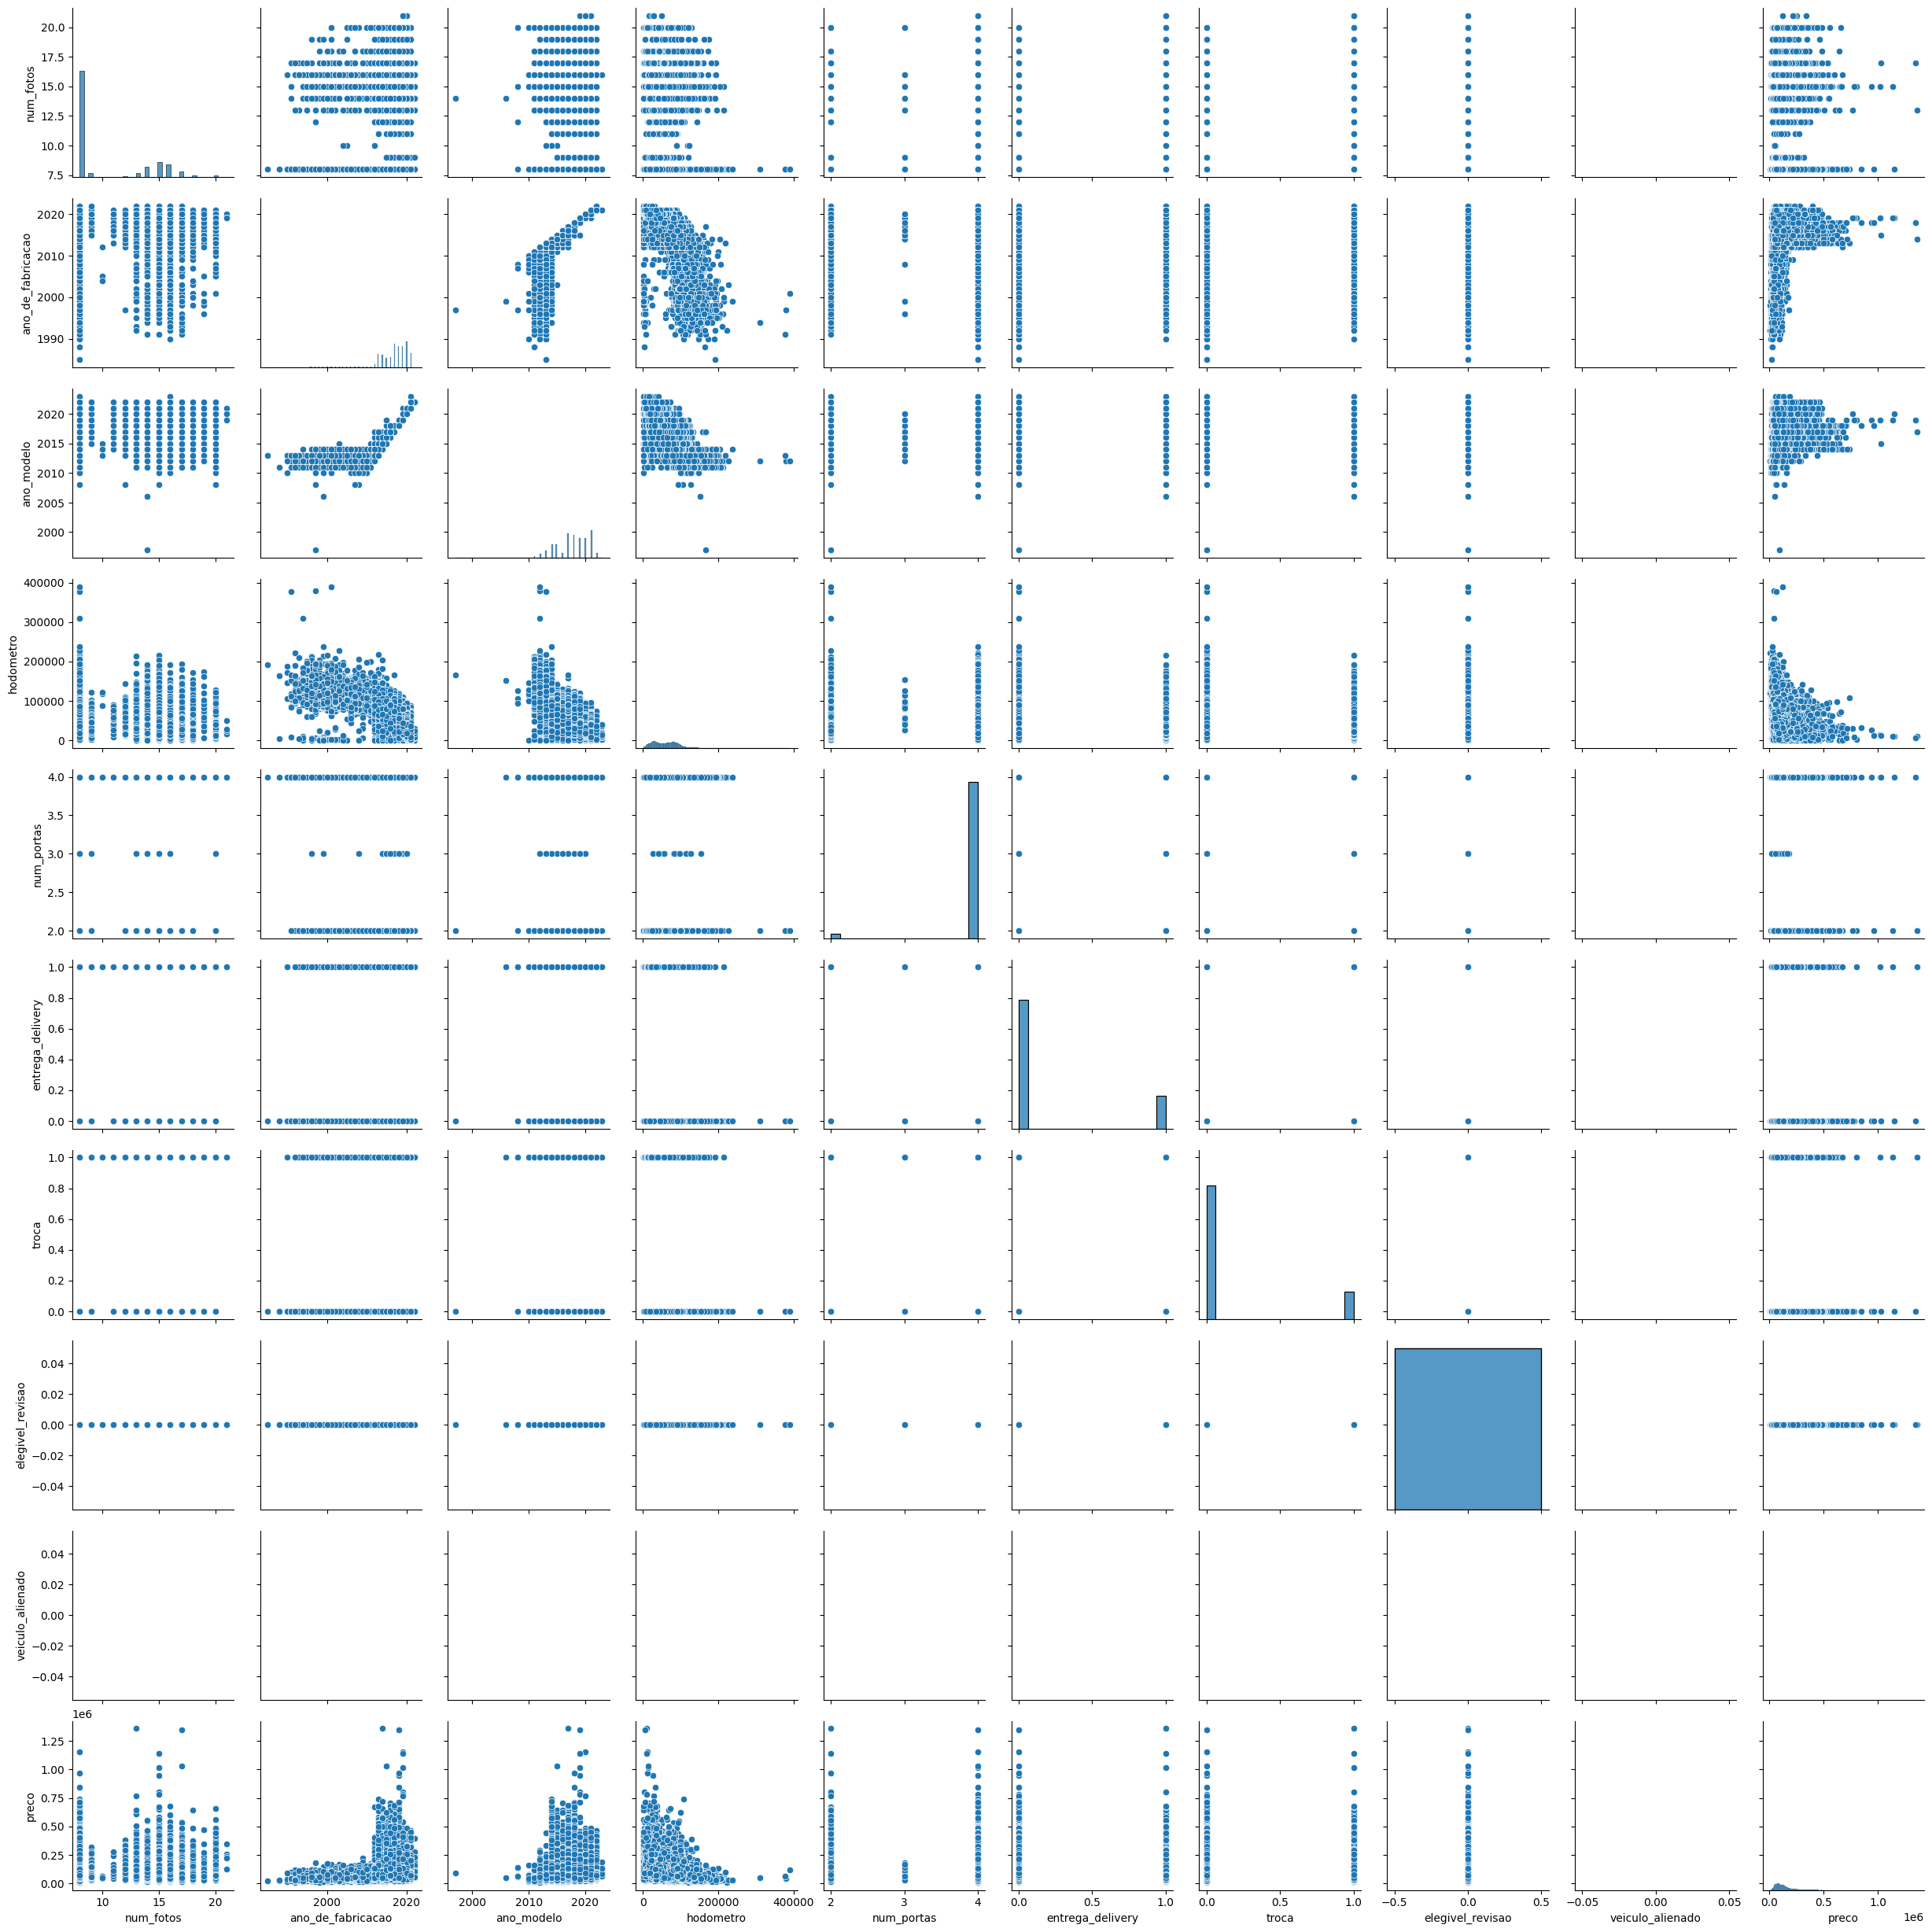

In [13]:
# Plot geral das colunas numéricas do dataset
sns.pairplot(cars_train);

### Criando algumas visualizações dos dados categóricos

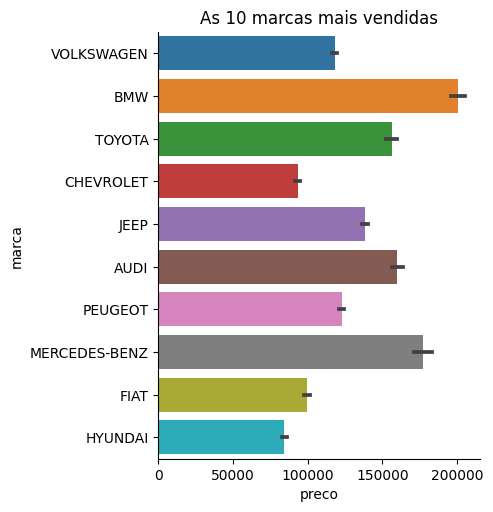

In [14]:
# Gráfico de barras com as 10 marcas mais vendidas e suas respectivas faixas de preço
marcas_mais_vendidas = cars_train.groupby('marca')['preco'].sum().nlargest(10).index
cars_train_filtrado = cars_train[cars_train['marca'].isin(marcas_mais_vendidas)]
g = sns.catplot(data=cars_train_filtrado, y='marca', x='preco', kind='bar', order=marcas_mais_vendidas)
g.set_yticklabels(labels=marcas_mais_vendidas)
ax = g.ax
ax.set_title('As 10 marcas mais vendidas')
plt.show()

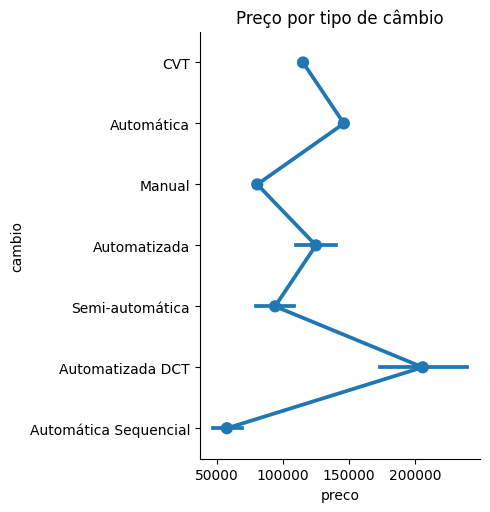

In [15]:
# Gráfico de pontos mostrando a média do preço dos carros por tipo de câmbio:
g = sns.catplot(data=cars_train, y='cambio', x='preco', kind='point')
ax = g.ax
ax.set_title('Preço por tipo de câmbio')

plt.show()

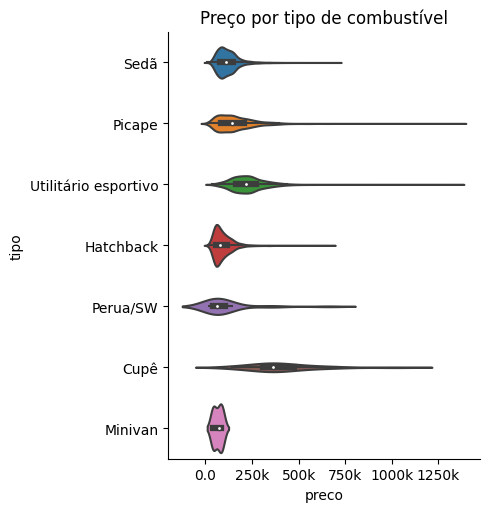

In [16]:
# Gráfico de violino mostrando a distribuição do preço dos carros por tipo de combustível:
from matplotlib.ticker import FuncFormatter

def formatar_eixo_x(x, pos):
    if x >= 1000:
        return f'{x/1000:.0f}k'
    else:
        return x

df_filtrado = cars_train[cars_train['preco'] > 0]
g = sns.catplot(data=df_filtrado, y='tipo', x='preco', kind='violin')
ax = g.ax
ax.xaxis.set_major_formatter(FuncFormatter(formatar_eixo_x))
ax.set_title('Preço por tipo de combustível')


plt.show()

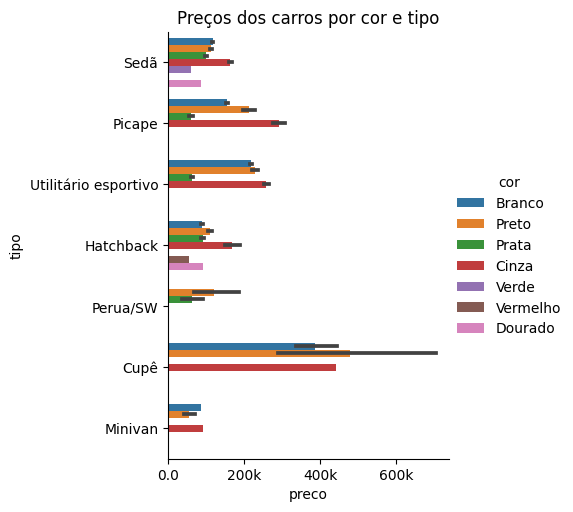

In [17]:
# Gráfico de barras mostrando a distribuição do preço dos carros por cor e tipo:
g = sns.catplot(data=cars_train, y='tipo', x='preco', hue='cor', kind='bar')
ax = g.ax
ax.xaxis.set_major_formatter(FuncFormatter(formatar_eixo_x))
ax.set_title('Preços dos carros por cor e tipo')
plt.show()


## Análise Exploratória

### 1) Qual o melhor estado cadastrado na base de dados para se vender um carro de marca popular e por quê?

In [18]:
# Definindo as 5 marcas de carros com o menor preço médio como as marcas de carro mais populares
marcas_populares = ['VOLKSWAGEN', 'FORD', 'FIAT', 'RENAULT', 'CHEVROLET']
cars_train_filtrado = cars_train[cars_train['marca'].isin(marcas_populares)]
preco_medio_por_marca = cars_train_filtrado.groupby('marca')['preco'].mean()
preco_medio_por_marca = preco_medio_por_marca.to_frame().reset_index()
preco_medio_por_marca = preco_medio_por_marca.sort_values(by='preco', ascending=False)
print(preco_medio_por_marca.head())



        marca          preco
2        FORD  127453.062261
4  VOLKSWAGEN  117940.087380
1        FIAT   99711.164582
0   CHEVROLET   93187.683964
3     RENAULT   82649.368865


In [19]:
# Definindo os Estados que mais venderam carros das marcas populares
vendas_por_estado = cars_train_filtrado.groupby('estado_vendedor').size()
vendas_por_estado = vendas_por_estado.sort_values(ascending=False)
print(vendas_por_estado.head())


estado_vendedor
São Paulo (SP)         6168
Rio de Janeiro (RJ)     974
Paraná (PR)             923
Santa Catarina (SC)     814
Minas Gerais (MG)       674
dtype: int64


#### R: O melhor Estado cadastrado na base para vender um carro de marca popular é São Paulo (SP), pois tem a maior quantidade de vendas dentre as 5 marcas populares da base de dados.

### 2) Qual o melhor estado para se comprar uma picape com transmissão automática e por quê?

In [20]:
# Selecionando apenas as linhas onde a coluna `tipo` é igual a "Picape"
picapes = cars_train[cars_train["tipo"] == "Picape"]

# Selecionando apenas as linhas onde a coluna `cambio` é igual a "Automática"
picapes_aut = picapes[picapes["cambio"] == "Automática"]

# Agrupando e ordenando os dados por Estado e calculando a média do preço
picapes_aut_por_estado = picapes_aut.groupby("estado_vendedor")["preco"].mean().sort_values(ascending=True)

# Imprimindo o Estado com o preço médio mais baixo
print(picapes_aut_por_estado.head(3))

estado_vendedor
Paraíba (PB)                93157.035264
Mato Grosso do Sul (MS)    144700.247621
Acre (AC)                  145256.693656
Name: preco, dtype: float64


#### R: O melhor Estado para se comprar uma picape com transmissão automática é a Paraíba por ter o menor preço médio do dataset.

## 3) Qual o melhor estado para se comprar carros que ainda estejam dentro da garantia de fábrica e por quê?

In [21]:
# Selecione apenas as linhas onde a coluna `garantia_de_fábrica` é igual a "sim"
garantia = cars_train[cars_train["garantia_de_fábrica"] == "Garantia de fábrica"]

# Agrupe os dados por estado e calcule a média do preço
garantia_por_estado = garantia.groupby("estado_vendedor")["preco"].mean().sort_values()

# Imprima o estado com o preço médio mais baixo
print(garantia_por_estado.head(3))

estado_vendedor
Paraíba (PB)     95762.746630
Pará (PA)        98156.615283
Amazonas (AM)    99617.303347
Name: preco, dtype: float64


#### R: O melhor estado para se comprar carros que ainda estão dentro da garantia de fábrica, considerando o menor preço médio, é a Paraíba.

## Modelagem do Dataset

In [22]:
cars_train.isnull().sum()

id                             0
num_fotos                    177
marca                          0
modelo                         0
versao                         0
ano_de_fabricacao              0
ano_modelo                     0
hodometro                      0
cambio                         0
num_portas                     0
tipo                           0
blindado                       0
cor                            0
tipo_vendedor                  0
cidade_vendedor                0
estado_vendedor                0
anunciante                     0
entrega_delivery               0
troca                          0
elegivel_revisao               0
dono_aceita_troca           7662
veiculo_único_dono         19161
revisoes_concessionaria    20412
ipva_pago                   9925
veiculo_licenciado         13678
garantia_de_fábrica        25219
revisoes_dentro_agenda     23674
veiculo_alienado           29584
preco                          0
dtype: int64

In [23]:
# Removendo os campos com muitos valores ausentes, devido à impossibilidade de se obter mais dados ou corrigí-los
colunas_para_remover = ['dono_aceita_troca', 'veiculo_único_dono', 'revisoes_concessionaria', 'ipva_pago', 'veiculo_licenciado', 'garantia_de_fábrica', 'revisoes_dentro_agenda', 'veiculo_alienado']
cars_train = cars_train.drop(colunas_para_remover, axis=1)
cars_test = cars_test.drop(colunas_para_remover, axis=1)

In [24]:
# Preenchendo os 177 valores ausentes da coluna num_fotos pela média da coluna
cars_train['num_fotos'] = cars_train['num_fotos'].fillna(cars_train['num_fotos'].mean())
cars_test['num_fotos'] = cars_test['num_fotos'].fillna(cars_test['num_fotos'].mean())

In [25]:
cars_train.isnull().sum()

id                   0
num_fotos            0
marca                0
modelo               0
versao               0
ano_de_fabricacao    0
ano_modelo           0
hodometro            0
cambio               0
num_portas           0
tipo                 0
blindado             0
cor                  0
tipo_vendedor        0
cidade_vendedor      0
estado_vendedor      0
anunciante           0
entrega_delivery     0
troca                0
elegivel_revisao     0
preco                0
dtype: int64

In [26]:
cars_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29584 entries, 0 to 29583
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 29584 non-null  object 
 1   num_fotos          29584 non-null  float64
 2   marca              29584 non-null  object 
 3   modelo             29584 non-null  object 
 4   versao             29584 non-null  object 
 5   ano_de_fabricacao  29584 non-null  int64  
 6   ano_modelo         29584 non-null  float64
 7   hodometro          29584 non-null  float64
 8   cambio             29584 non-null  object 
 9   num_portas         29584 non-null  int64  
 10  tipo               29584 non-null  object 
 11  blindado           29584 non-null  object 
 12  cor                29584 non-null  object 
 13  tipo_vendedor      29584 non-null  object 
 14  cidade_vendedor    29584 non-null  object 
 15  estado_vendedor    29584 non-null  object 
 16  anunciante         295

<ipython-input-27-aebb43aa14a1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = cars_train.corr()["preco"].sort_values(ascending=False)
<ipython-input-27-aebb43aa14a1>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = cars_train.corr()


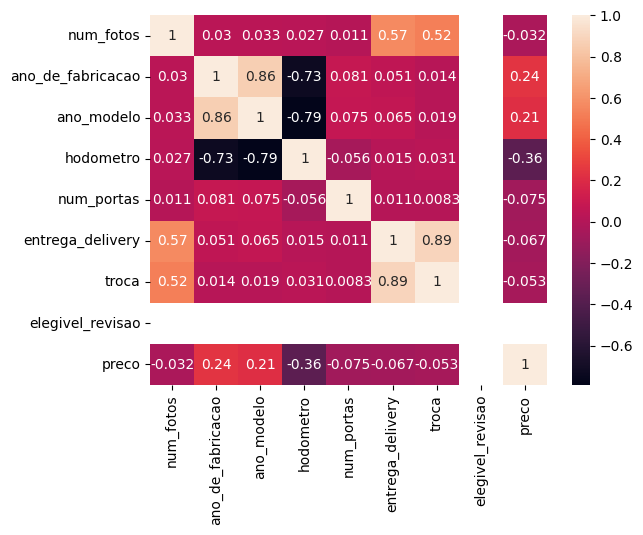

In [27]:
# Determinar a correlação entre as colunas do dataset em relação à coluna preco e plotar um mapa de calor.
correlation = cars_train.corr()["preco"].sort_values(ascending=False)
corr_matrix = cars_train.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [28]:
# Aplicando o Label Encoder nas colunas categóricas do dataset cars.train
from sklearn.preprocessing import LabelEncoder

# Crie uma instância do LabelEncoder
le = LabelEncoder()

# Selecione todas as colunas categóricas
cat_columns_train = cars_train.select_dtypes(include=['object', 'bool']).columns

# Ajuste e transforme cada coluna categórica
for col in cat_columns_train:
    le.fit(cars_train[col])
    cars_train[col] = le.transform(cars_train[col])


In [29]:
# Exiba os tipos de dados das colunas do dataframe X_train
print(cars_train.dtypes)


id                     int64
num_fotos            float64
marca                  int64
modelo                 int64
versao                 int64
ano_de_fabricacao      int64
ano_modelo           float64
hodometro            float64
cambio                 int64
num_portas             int64
tipo                   int64
blindado               int64
cor                    int64
tipo_vendedor          int64
cidade_vendedor        int64
estado_vendedor        int64
anunciante             int64
entrega_delivery       int64
troca                  int64
elegivel_revisao       int64
preco                float64
dtype: object


In [30]:
from sklearn.model_selection import train_test_split

# Separe as variáveis independentes e a variável de resposta
X = cars_train.drop("preco", axis=1)
y = cars_train["preco"]

# Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [31]:
from sklearn.preprocessing import MinMaxScaler

# Crie uma instância do MinMaxScaler
scaler = MinMaxScaler()

# Ajuste o scaler nos dados de treinamento
scaler.fit(X_train)

# Transforme os dados de treinamento e teste
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
from sklearn.linear_model import Lasso

# Construa um modelo de regressão linear com regularização L1
model = Lasso(alpha=1.0)
model.fit(X_train_scaled, y_train)

# Preveja os preços dos dados de teste
y_pred = model.predict(X_test_scaled)
print(y_pred)

[ 86757.44217159  98147.53655011 170050.40811962 ... 133205.05640219
 101851.18812546 123097.04367036]


In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calcule as métricas de desempenho
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

MAE: 42788.43719295312
MSE: 3528509843.823869
RMSE: 59401.261298257545


In [34]:
# Certifique-se de que o novo conjunto de dados tenha as mesmas colunas que o conjunto de dados de treinamento
cars_test = cars_test[X_train.columns]

In [35]:
# Aplicando o Label Encoder nas colunas categóricas do dataset cars_test
cat_columns_test = cars_test.select_dtypes(include=['object', 'bool']).columns

# Transforme cada coluna categórica
for col in cat_columns_test:
    le.fit(cars_test[col])
    cars_test[col] = le.transform(cars_test[col])

In [36]:
# Escale os dados usando o MinMaxScaler
cars_test_scaled = scaler.transform(cars_test)

In [37]:
# Faça previsões no novo conjunto de dados
new_y_pred = model.predict(cars_test_scaled)
print(new_y_pred)

[121252.09380075 150463.57042647 179256.95585769 ... 129179.93528297
 113891.65840711 197929.37160394]


In [38]:
new_y_pred = new_y_pred[:8876]
erro_percentual = abs((y_pred - new_y_pred) / y_pred) * 100
print(erro_percentual)

[39.75987623 53.30346101  5.41401096 ... 27.74583806 55.65086017
  5.83581363]


In [39]:
erro_percentual_geral = np.mean(erro_percentual) - 100
print(f'O modelo que rodou nos dados de teste possui um erro médio em relação ao que rodou sobre os dados de treino de {round(erro_percentual_geral, 2)}%')

O modelo que rodou nos dados de teste possui um erro médio em relação ao que rodou sobre os dados de treino de 19.26%


In [49]:
data = {'ID': cars_test['id'][:8876], 'Predito': new_y_pred}
df = pd.DataFrame(data)
df.head()

,ID,Predito
0,1123.0,121252.093801
1,6503.0,150463.570426
2,7006.0,179256.955858
3,4052.0,138910.221248
4,1979.0,97023.481668


In [50]:
df.to_excel('resultado.xlsx', index=False)


## Concluões

O modelo construído foi feito com uma regressão linear, que é um algoritmo simples mas que atende bem casos onde o problema de negócio a ser resolvido é uma previsão de preços baseados em diversas características dadas, que é o caso deste dataset onde deve-se prever os preços de carros seminovos. Usamos a medida de performance baseada no cálculo com erros, ou seja o quanto o modelo se aproximou dos dados de treinamento, mas não foi possível aferir a acurácia devido a esta métrica ser mais adequada a problemas de classificação.